### Notebook for plotting results for the manuscript

April 11, 2015

In [52]:
import pihm_methods as pm
reload(pm)
import pandas as pd
%pylab inline
plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Plots for the supplementary material of the PIHM manuscript

In [187]:
def make_full_plots_for_suppplementary(dat, mups, ld50_vec, ks, param, save_name, 
                                       ylim=[(-0.1, 2), (-0.1, 2)], 
                                       xlabel=["Pre-mortality Sample Size", "Average Sample Size Post-mortality"], 
                                       ylabel=["Type I Error", "Power"], add_red_line=True, samps=None,
                                       plot_number=(3, 2), figsize=(12, 12), legend_loc=["best", "best"]):
    """
    Function for plotting simulation results
    
    
    dat : simulated data
    
    mups : list of mups used
    
    ld50_vec : list of ld50s used
    
    ks : list of ks used
    
    param : string which is the param of interest
    
    save_name : string which is the name of the file to save
    
    ylim : list of tuples for the ylim of different axises
    
    xlabel : The xlabel.  A list of xlabels. This first is the left hand column, the second is the right hand column.
    
    ylabel : The different ylabels. The first is the left hand column, the second is the right hand column
    
    add_red_line : For power analysis, add red significance line if True
    
    samp: If you want to specify a different x axis include a list or tuple here.
    
    """
    
    colors = ["black", "grey", "green"]
    linestyle = [":", "--", "-"]
    ld50_descrip = ["Gradual", "Moderate", "Steep"]
    lm_color = "black"  # Likelihood method color
    am_color = "#B8B8B8"  # Adjei method color

    for l, mup in enumerate(mups):

        fig, axes = plt.subplots(plot_number[0], plot_number[1], figsize=figsize)
        
        axes = np.atleast_2d(axes)
        
        for ax in np.ravel(axes):
            ax.xaxis.tick_bottom()
            ax.yaxis.tick_left()

        bias_ax = np.atleast_1d(axes[:, 0])
        prec_ax = np.atleast_1d(axes[:, 1])
        ld50s = ld50_vec[l]

        for i, k in enumerate(ks):

            bias_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                        transform = bias_ax[i].transAxes)

            prec_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                        transform = prec_ax[i].transAxes)
            for j, ld50 in enumerate(ld50s):

                try:
                    samp_adj, bias_adj, prec_adj = pm.extract_simulation_results(dat, [mup, ld50, k], "adjei", param) 
                except:
                    print([mup, ld50, k])

                try:
                    samp_like, bias_like, prec_like = pm.extract_simulation_results(dat, [mup, ld50, k], "likelihood", param)
                except:
                    print([mup, ld50, k])

                like_res = pd.DataFrame(zip(samp_like, bias_like, prec_like), columns=["N", "b", "p"])
                like_res.sort("N", inplace=True)

                adj_res = pd.DataFrame(zip(samp_adj, bias_adj, prec_adj), columns=["N", "b", "p"])
                adj_res.sort("N", inplace=True)

                like_label = "Like. Method: " + str(ld50_descrip[j])
                adjei_label = "Adjei Method: " + str(ld50_descrip[j])
                
                
                if samps: # If you are using some default samples sizes
                        
                    # Take into account unequal lengths
                    if len(samps) != len(like_res.p):
                        tsamp = samps[1:]
                    else:
                        tsamp = samps
                        
                    bias_ax[i].plot(tsamp, like_res.b, color=lm_color, ls=linestyle[j], label=like_label)
                    bias_ax[i].plot(tsamp, adj_res.b, color=am_color, ls=linestyle[j], label=adjei_label)
                
                else:
                    bias_ax[i].plot(like_res.N, like_res.b, color=lm_color, ls=linestyle[j], label=like_label)
                    bias_ax[i].plot(adj_res.N, adj_res.b, color=am_color, ls=linestyle[j], label=adjei_label)
                    
                    
                bias_ax[i].set_ylim(ylim[0])
                
                
                if add_red_line:
                    bias_ax[i].hlines(0.05, *bias_ax[i].get_xlim(), color="red",  linestyle="dashed")

                try:
                    prec_ax[i].plot(like_res.N, like_res.p, color=lm_color, ls=linestyle[j], label=like_label)
                    prec_ax[i].plot(adj_res.N, adj_res.p,  color=am_color, ls=linestyle[j], label=adjei_label)  
                    prec_ax[i].set_ylim(ylim[1])
                    
                except:
                    print([mup, ld50, k])

                # Set xlabels
                if prec_ax[i].is_last_row():
                    prec_ax[i].set_xlabel(xlabel[1])

                if bias_ax[i].is_last_row():
                    bias_ax[i].set_xlabel(xlabel[0])

                # Set ylabels
                prec_ax[i].set_ylabel(ylabel[1])
                bias_ax[i].set_ylabel(ylabel[0])

            bias_ax[i].legend(loc=legend_loc[0], prop={"size" : 9})
            prec_ax[i].legend(loc=legend_loc[1], prop={"size" : 9})


        #fig.suptitle(r"$\mu_p = %i$" % (mup), y=1.03, size=20)
        plt.tight_layout()
        fig.savefig("../results/{0}{1}.pdf".format(save_name, mup), dpi=300)

### Bias an precision plots for manuscript

In [191]:
# Load in the results from scenario 1
reload(pm)
sc1 = pd.read_pickle("../results/scenario1_analysis_results.pkl")

Make plots for the manuscript simulations and the parameter LD50

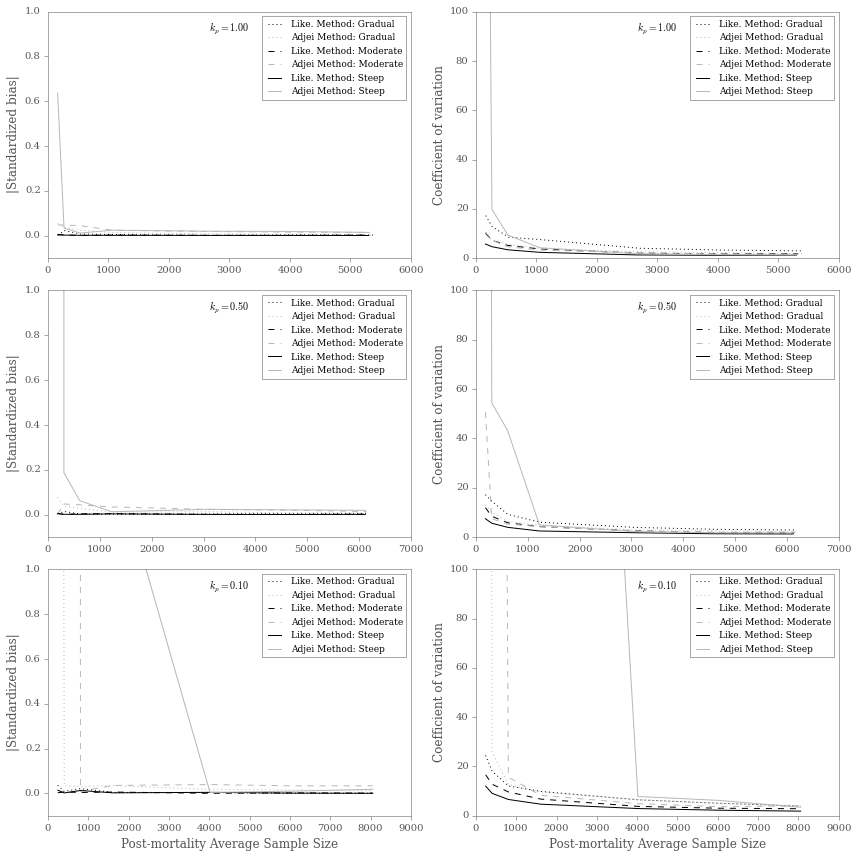

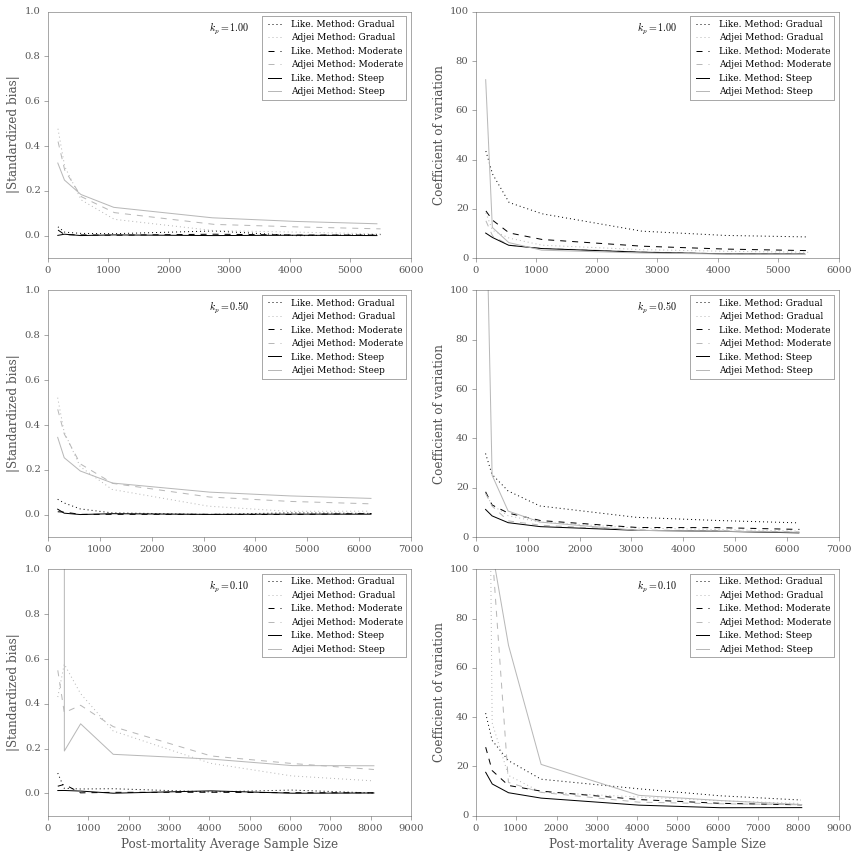

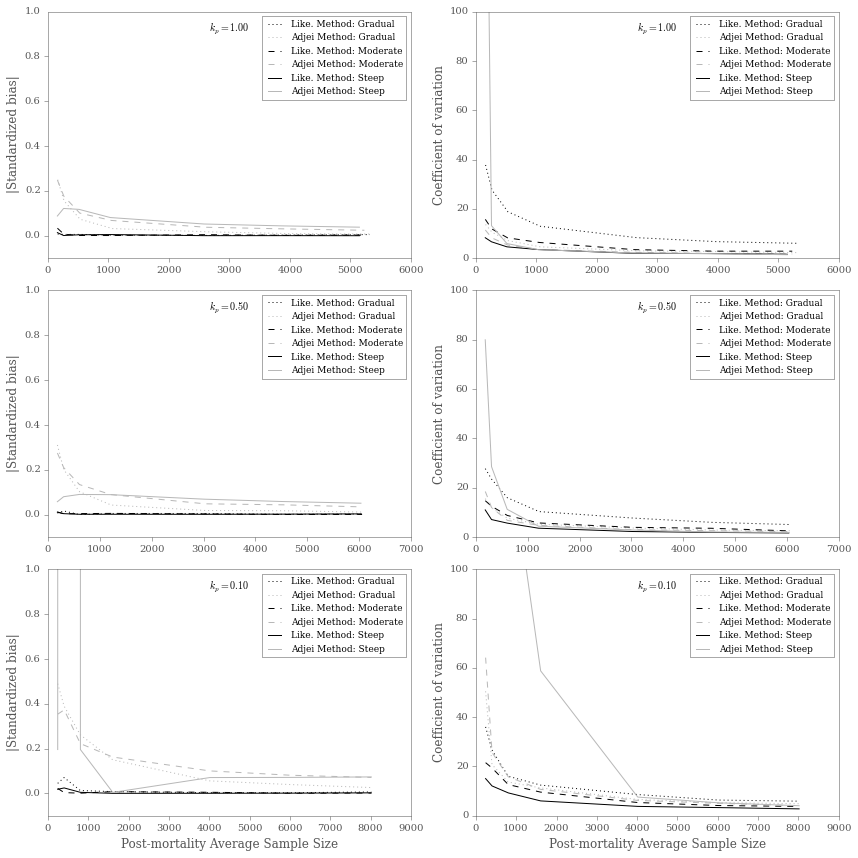

In [192]:
# Make plots for simulations and LDt0
param = "ld50"

mups = [10, 100, 50]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(5, -1.4), (10, -2.8), (20, -5.6)]]
ks = [1, 0.5, .1]

make_full_plots_for_suppplementary(sc1, mups, ld50_vec, ks, param, save_name="bais_prec_figure_for_ld50_mu", 
                                   ylim=[(-0.1, 1), (0, 100)], 
                                   xlabel=["Post-mortality Average Sample Size", "Post-mortality Average Sample Size"],
                                  ylabel=["|Standardized bias|", "Coefficient of variation"],
                                  add_red_line=False)


Make plots of the simulations and the parameter $a$

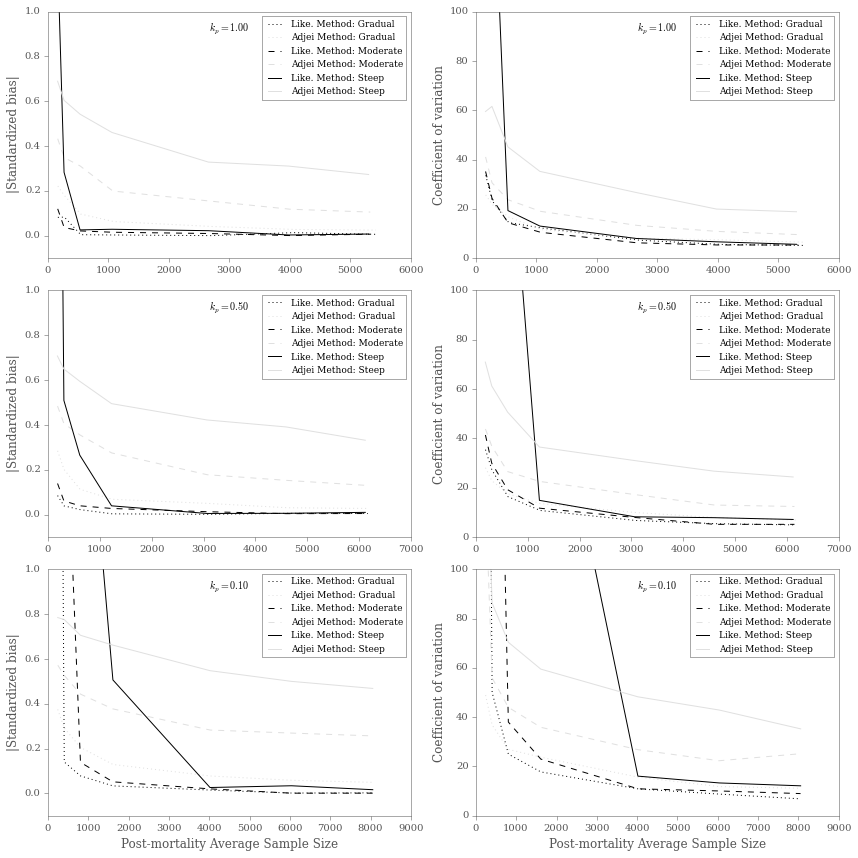

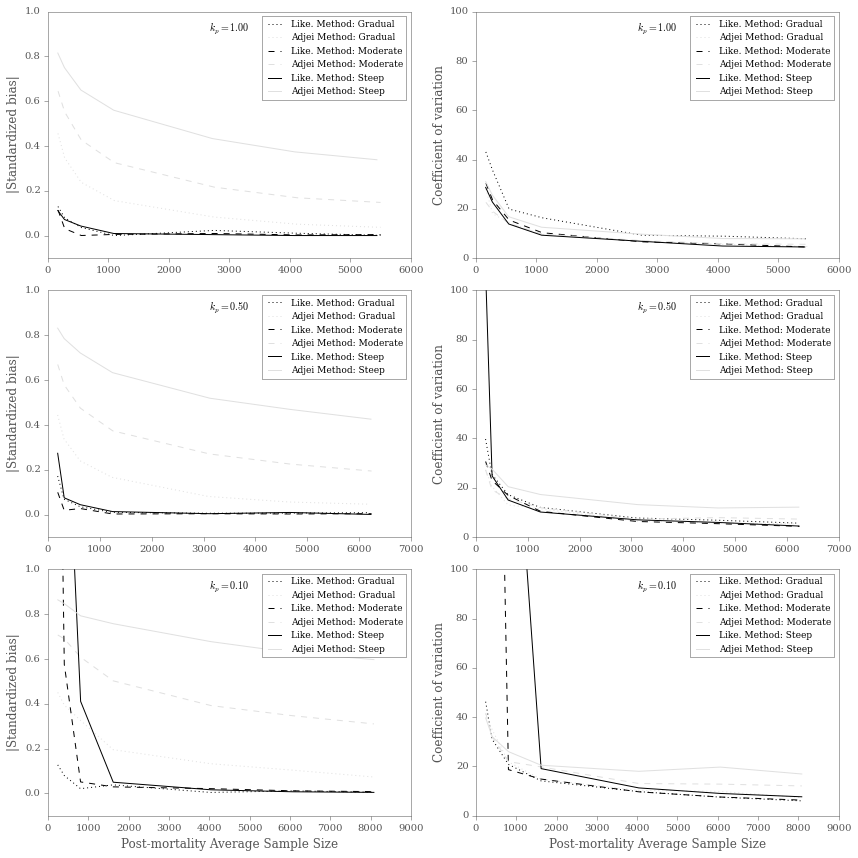

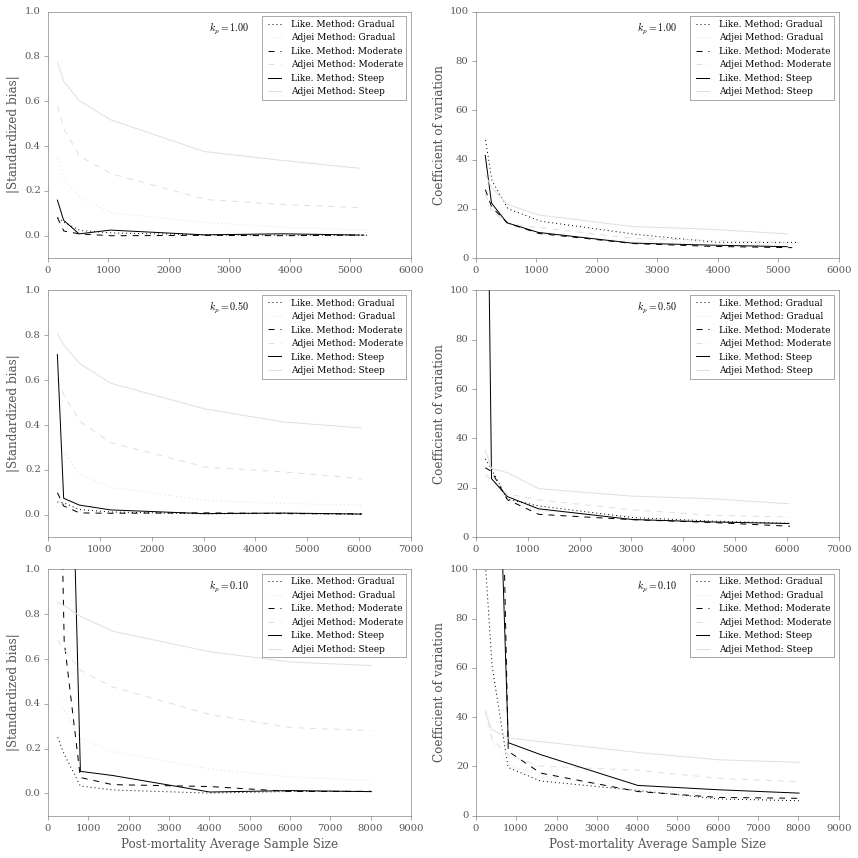

In [45]:
# Make 
param = "a"

mups = [10, 100, 50]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(5, -1.4), (10, -2.8), (20, -5.6)]]
ks = [1, 0.5, .1]

make_full_plots_for_suppplementary(sc1, mups, ld50_vec, ks, param, save_name="bais_prec_figure_for_a_mu", 
                                   ylim=[(-0.1, 1), (0, 100)], 
                                   xlabel=["Post-mortality Average Sample Size", "Post-mortality Average Sample Size"],
                                  ylabel=["|Standardized bias|", "Coefficient of variation"],
                                  add_red_line=False)


### Type I error and power analysis

Make plots for Type I error and power for the different simulation parameter combinations

In [71]:
# Load in the data
dat = pd.read_pickle("../results/typeIandII_analysis_results.pkl")

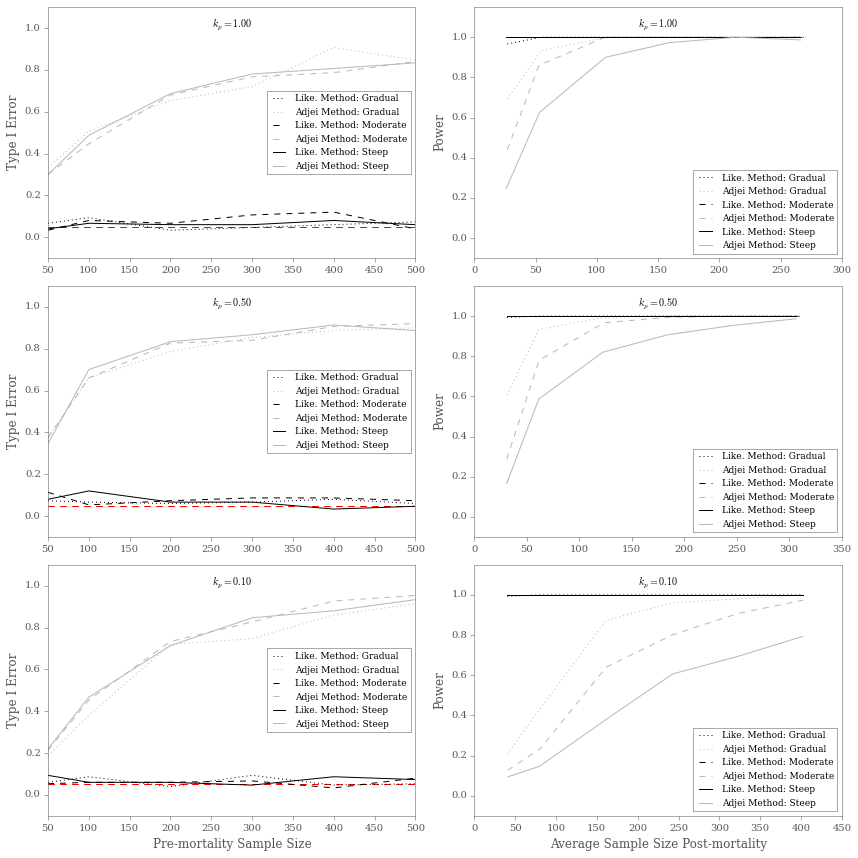

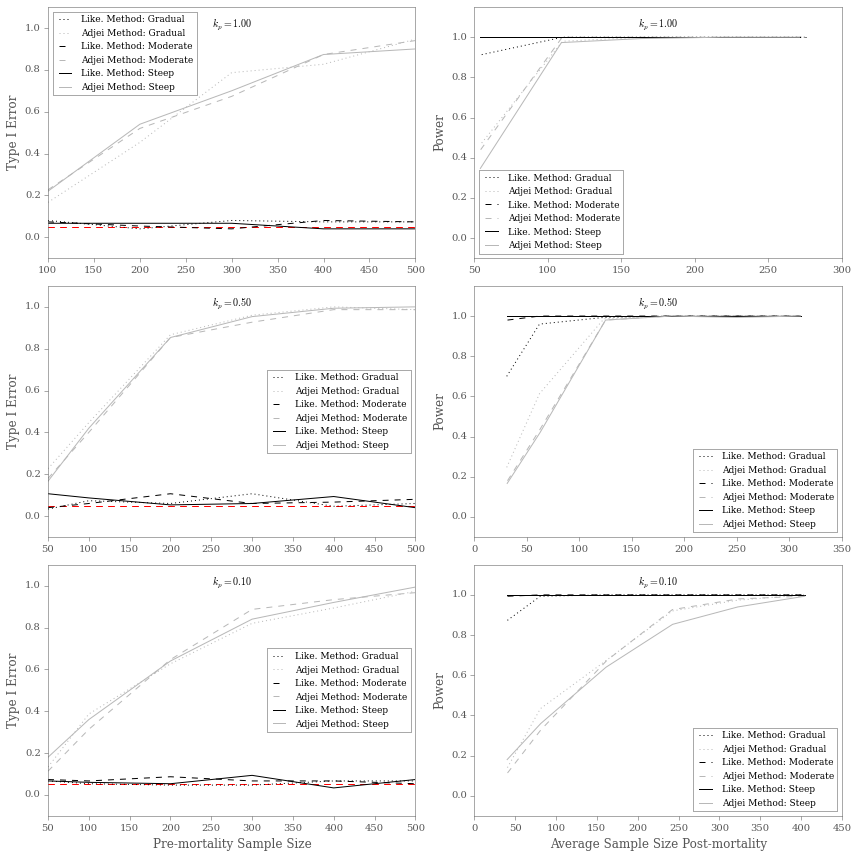

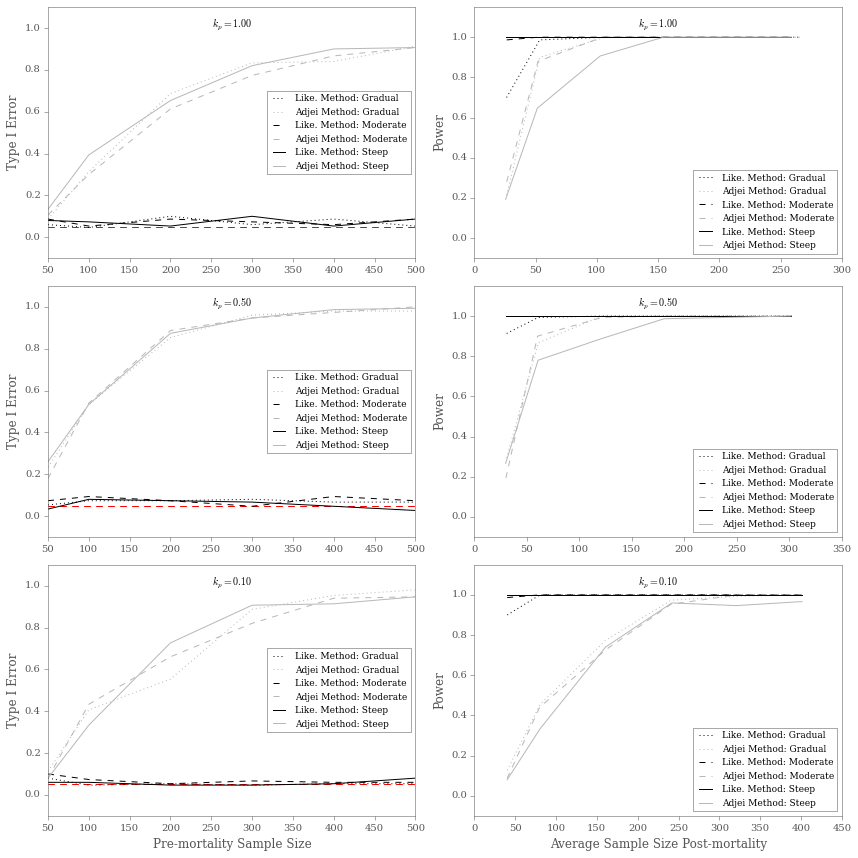

In [78]:
# Make 
param = "p"

mups = [10, 100, 50]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(5, -1.4), (10, -2.8), (20, -5.6)]]
ks = [1, 0.5, .1]

make_full_plots_for_suppplementary(dat, mups, ld50_vec, ks, param, save_name="typeIpower_figure_for_mu", 
                                   samps = [50, 100, 200, 300, 400, 500], ylim=[(-0.1, 1.1), (-0.1, 1.15)])

### Make a plot for supplementary material comparing the Crofton (1971) paper results with this paper's results


In [10]:
run analysis_for_manuscript_compare_crofton_method.py

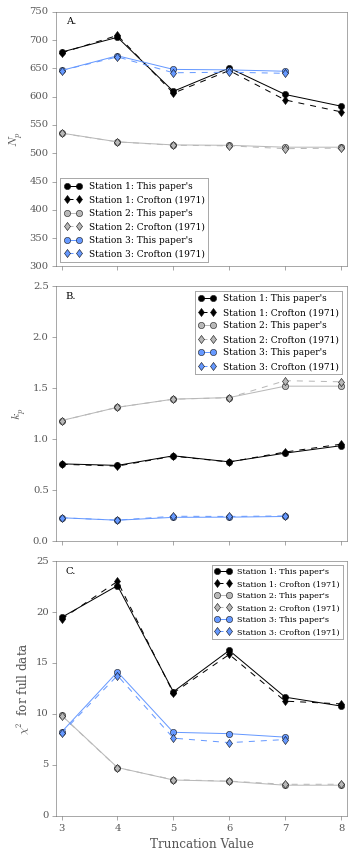

In [11]:
# Plot the results of the Crofton Method
plt.rcParams['axes.color_cycle'] = ['black', 'black', '#B8B8B8', '#B8B8B8', "#6699FF", "#6699FF"]
fig, axes = plt.subplots(3, 1, figsize=(5, 12), sharex=True)

labels = ["A.", "B.", "C."]
for i, ax in enumerate(axes):
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.text(0.05, 0.95, labels[i], horizontalalignment="center", transform=ax.transAxes)
    
axes[2].set_xlabel("Truncation Value")
axes[2].set_xlim(2.9, 8.1)
    
axes[0].plot(np.arange(3, 9), our_st1_N, '-o', label="Station 1: This paper's")
axes[0].plot(np.arange(3, 9), crof_st1_N, '--d', label="Station 1: Crofton (1971)")
axes[0].plot(np.arange(3, 9), our_st2_N, '-o', label="Station 2: This paper's")
axes[0].plot(np.arange(3, 9), crof_st2_N, '--d', label="Station 2: Crofton (1971)")
axes[0].plot(np.arange(3, 8), our_st3_N, '-o', label="Station 3: This paper's")
axes[0].plot(np.arange(3, 8), crof_st3_N, '--d', label="Station 3: Crofton (1971)")

axes[0].set_ylabel(r"$N_p$")
axes[0].set_ylim((300, 750))
axes[0].legend(loc="best", prop={"size":9})

axes[1].plot(np.arange(3, 9), our_st1_ks, '-o', label="Station 1: This paper's")
axes[1].plot(np.arange(3, 9), crof_st1_ks, '--d', label="Station 1: Crofton (1971)")
axes[1].plot(np.arange(3, 9), our_st2_ks, '-o', label="Station 2: This paper's")
axes[1].plot(np.arange(3, 9), crof_st2_ks, '--d', label="Station 2: Crofton (1971)")
axes[1].plot(np.arange(3, 8), our_st3_ks, '-o', label="Station 3: This paper's")
axes[1].plot(np.arange(3, 8), crof_st3_ks, '--d', label="Station 3: Crofton (1971)")

axes[1].set_ylabel(r"$k_p$")
axes[1].set_ylim((0, 2.5))
axes[1].legend(loc="best", prop={"size":9})

axes[2].plot(np.arange(3, 9), zip(*crof_st1_compare_ss)[1], '-o', label="Station 1: This paper's")
axes[2].plot(np.arange(3, 9), zip(*crof_st1_compare_ss)[0], '--d', label="Station 1: Crofton (1971)")
axes[2].plot(np.arange(3, 9), zip(*crof_st2_compare_ss)[1], '-o', label="Station 2: This paper's")
axes[2].plot(np.arange(3, 9), zip(*crof_st2_compare_ss)[0], '--d', label="Station 2: Crofton (1971)")
axes[2].plot(np.arange(3, 8), zip(*crof_st3_compare_ss)[1], '-o', label="Station 3: This paper's")
axes[2].plot(np.arange(3, 8), zip(*crof_st3_compare_ss)[0], '--d', label="Station 3: Crofton (1971)")

axes[2].set_ylabel(r"$\chi^2$ for full data")
#axes[2].set_ylim((0, 2))
axes[2].legend(loc="best", prop={"size":8})

plt.tight_layout()
fig.savefig("../results/compare_crofton.pdf", dpi=300)

# Plots of the main text of PIHM article

#### Making  figure 1 for manuscript

**Part II**: Will combine these two using TiKZ in the manuscript itself

In [79]:
# Load in the data
dat = pd.read_pickle("../results/typeIandII_analysis_results.pkl")

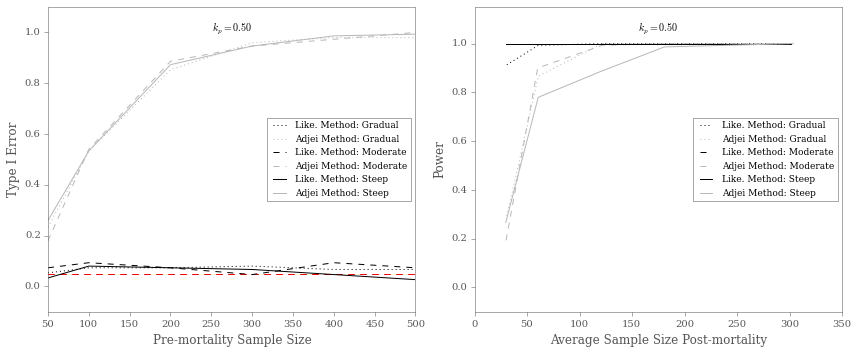

In [86]:
# Make 
param = "p"


mups = [10, 100, 50]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(5, -1.4), (10, -2.8), (20, -5.6)]]
ks = [1, 0.5, .1]

mups = [50]
ld50_vec = [[(5, -1.4), (10, -2.8), (20, -5.6)]]
ks = [0.5]

make_full_plots_for_suppplementary(dat, mups, ld50_vec, ks, param, save_name="figure1_partII_for_manuscript", 
                                   samps = [50, 100, 200, 300, 400, 500], plot_number=(1,2),
                                   figsize=(12, 5), legend_loc=["best", "center right"], 
                                   ylim=[(-0.1, 1.1), (-0.1, 1.15)])



**Making Figure 1 part 1: The conceptual plot**

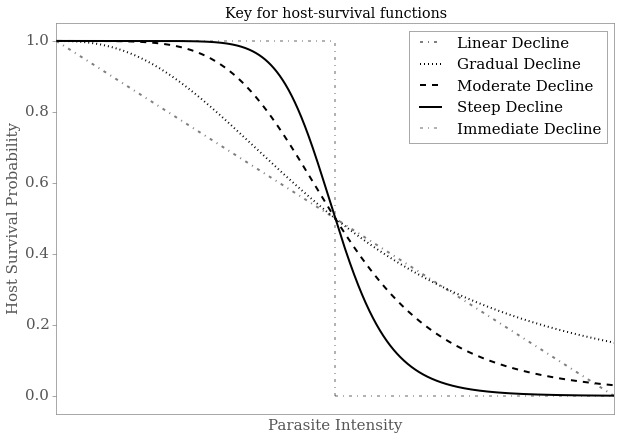

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

vals = np.linspace(0, np.exp(5 / 2.5) / 0.5, 10000)
alphas = [0.1]

ax.plot(vals, 1 + -0.5 / np.exp(5 / 2.5) * vals, '-.', lw=2, color='black', alpha=0.5, 
            label="Linear Decline")

ax.plot(vals, pm.surv_prob(vals, 5, -2.5), color="black", linestyle=":", linewidth=2, 
                    label="Gradual Decline")

ax.plot(vals, pm.surv_prob(vals, 10, -5), color="black", linestyle="--", linewidth=2,
                    label="Moderate Decline")

ax.plot(vals, pm.surv_prob(vals, 20, -10), color="black", linestyle="-", linewidth=2,
                    label="Steep Decline")


ialpha = 0.3
ax.hlines(1, 0, np.exp(5 / 2.5), linestyle='-.', lw=2, color='black', alpha=ialpha)
ax.vlines(np.exp(5 / 2.5), 0, 1, linestyle="-.", lw=2, color='black', alpha=ialpha)
ax.hlines(0, np.exp(5 / 2.5), np.exp(5 / 2.5) / 0.5, lw=2, linestyle='-.', color='black', 
                          label="Immediate Decline", alpha=ialpha)
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(0, np.exp(5 / 2.5) / 0.5)
ax.set_xlabel("Parasite Intensity", size=15)
ax.set_ylabel("Host Survival Probability", size=15)
ax.legend(prop={'size' : 15})
ax.tick_params(axis='both', which='major', labelsize=15, labelbottom=False, bottom=False)

ax.set_title("Key for host-survival functions")
fig.savefig("../results/figure1_partI_for_manuscript.pdf", dpi=300)

### Making figure 2

Figure 2 will combine the LD50 and the a plots for a given combination

In [6]:
# Load in the results from scenario 1
sc1 = pd.read_pickle("../results/scenario1_analysis_results.pkl")

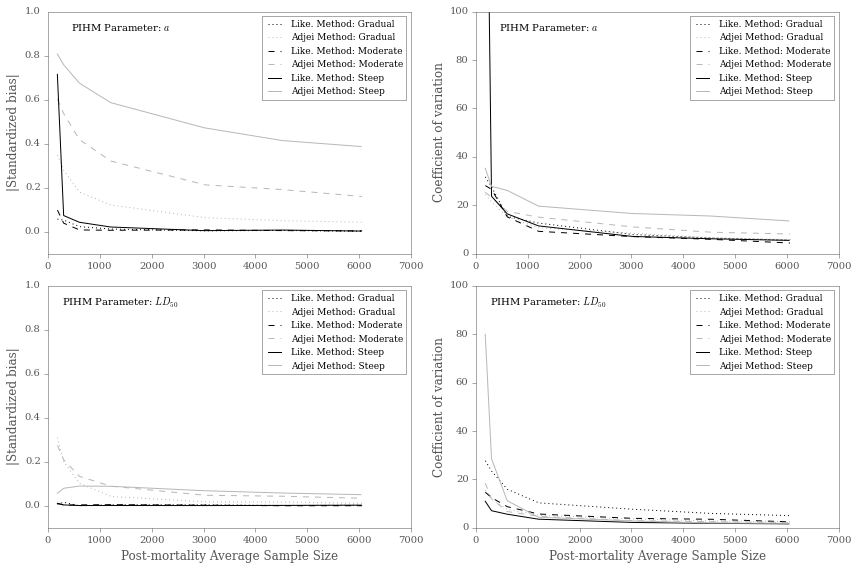

In [9]:
# Choose the mu_p and k_p to display

mup = 50
ld50s = [(5, -1.4), (10, -2.8), (20, -5.6)]
k = 0.5

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = np.atleast_2d(axes)

for ax in np.ravel(axes):
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

bias_ax = np.atleast_1d(axes[:, 0])
prec_ax = np.atleast_1d(axes[:, 1])

colors = ["black", "grey", "green"]
linestyle = [":", "--", "-"]
ld50_descrip = ["Gradual", "Moderate", "Steep"]
lm_color = "black"  # Likelihood method color
am_color = "#B8B8B8"  # Adjei method color

params = ['a', 'ld50']
pretty_params = ['$a$', '$LD_{50}$']

for i, param in enumerate(params):
    
    bias_ax[i].text(0.2, 0.92, r"PIHM Parameter: %s" % pretty_params[i], horizontalalignment='center', 
                                         transform = bias_ax[i].transAxes)

    prec_ax[i].text(0.2, 0.92, r"PIHM Parameter: %s" % pretty_params[i], horizontalalignment='center', 
                                          transform = prec_ax[i].transAxes)
    
    for j, ld50 in enumerate(ld50s):
        
        # Extract these results
        samp_adj, bias_adj, prec_adj = pm.extract_simulation_results(sc1, [mup, ld50, k], "adjei", param)
        samp_like, bias_like, prec_like = pm.extract_simulation_results(sc1, [mup, ld50, k], "likelihood", param)

        like_res = pd.DataFrame(zip(samp_like, bias_like, prec_like), columns=["N", "b", "p"])
        like_res.sort("N", inplace=True)

        adj_res = pd.DataFrame(zip(samp_adj, bias_adj, prec_adj), columns=["N", "b", "p"])
        adj_res.sort("N", inplace=True)
        
        like_label = "Like. Method: " + str(ld50_descrip[j])
        adjei_label = "Adjei Method: " + str(ld50_descrip[j])
        
        bias_ax[i].plot(like_res.N, like_res.b, color=lm_color, ls=linestyle[j], label=like_label)
        bias_ax[i].plot(adj_res.N, adj_res.b, color=am_color, ls=linestyle[j], label=adjei_label)
        
        prec_ax[i].plot(like_res.N, like_res.p, color=lm_color, ls=linestyle[j], label=like_label)
        prec_ax[i].plot(adj_res.N, adj_res.p,  color=am_color, ls=linestyle[j], label=adjei_label) 
        
                        # Set xlabels
        if prec_ax[i].is_last_row():
            prec_ax[i].set_xlabel("Post-mortality Average Sample Size")

        if bias_ax[i].is_last_row():
            bias_ax[i].set_xlabel("Post-mortality Average Sample Size")

        # Set ylabels
        prec_ax[i].set_ylabel("Coefficient of variation")
        bias_ax[i].set_ylabel("|Standardized bias|")

        bias_ax[i].legend(prop={"size" : 9})
        prec_ax[i].legend(prop={"size" : 9})
        
        bias_ax[i].set_ylim(-0.1, 1)
        prec_ax[i].set_ylim(0, 100)

plt.tight_layout()
fig.savefig("../results/figure2_for_manuscript.pdf", dpi=300)

# Making Figure 4

Making a plot of the full likelihood results.  Displaying power and bias.

In [13]:
# Load in the results from scenario 1
full_like = pd.read_pickle("../results/full_likelihood_analysis_results_just_10.pkl")

(424.27802345058632, (10, -5))
(82.921072026800658, (20, -10))


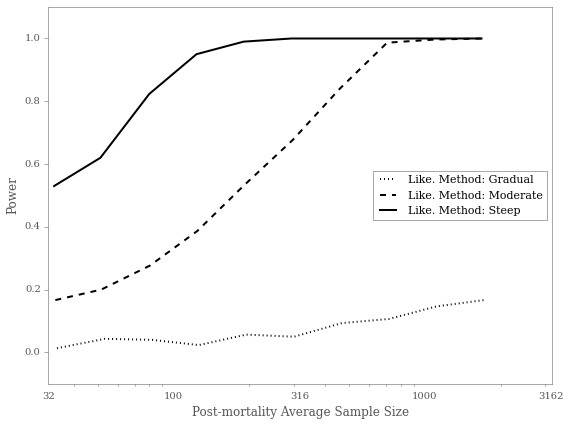

In [84]:
# Choose the mu_p and k_p to display
from scipy.interpolate import interp1d
reload(pm)
mup = 10
ld50s = [(5, -2.5), (10, -5), (20, -10)]

k = 1

# mups = [10, 100, 50]
# ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
#             [(5, -1.15), (10, -2.3), (20, -4.6)], 
#             [(5, -1.4), (10, -2.8), (20, -5.6)]]

fig, axes = plt.subplots(1, 1, figsize=(8, 6))


for ax in np.ravel(axes):
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

power_ax = axes

colors = ["black", "grey", "green"]
linestyle = [":", "--", "-"]
ld50_descrip = ["Gradual", "Moderate", "Steep"]
lm_color = "black"  # Likelihood method color
am_color = "#E0E0E0"  # Adjei method color

params = ['p']


for i, param in enumerate(params):
    
#     bias_ax[i].text(0.2, 0.92, r"PIHM Parameter: %s" % pretty_params[i], horizontalalignment='center', 
#                                          transform = bias_ax[i].transAxes)

#     prec_ax[i].text(0.2, 0.92, r"PIHM Parameter: %s" % pretty_params[i], horizontalalignment='center', 
#                                           transform = prec_ax[i].transAxes)
    
    for j, ld50 in enumerate(ld50s):
        
        # Extract these results
        samp, bias, prec = pm.extract_full_likelihood_simulation(full_like, [mup, ld50, k], param)

        like_res = pd.DataFrame(zip(samp, bias, prec), columns=["N", "b", "p"])
        like_res.sort("N", inplace=True)

        
        like_label = "Like. Method: " + str(ld50_descrip[j])
        
        if param == 'p':
            power_ax.plot(like_res.N, like_res.p, color=lm_color, ls=linestyle[j], label=like_label, lw=2)
            interp_fxn = interp1d(like_res.N, like_res.p)
            vals = np.linspace(np.min(like_res.N), np.max(like_res.N), 200)
            
            try:
                gt = vals[interp_fxn(vals) > 0.8][0]
                print (gt, ld50)
            except:
                pass

                
        else:
            ld50_ax.plot(like_res.N, like_res.b, color=lm_color, ls=linestyle[j], label=like_label)

#ld50_ax.legend(prop={"size" : 9})
power_ax.legend(prop={"size" : 11}, loc="center right")
power_ax.set_ylim(-0.1, 1.1)

#power_ax.set_yticklabels([0] + list(np.linspace(0, 1, 6)))

power_ax.set_xlim(32, 3200)

power_ax.set_xscale('log')
power_ax.set_xticks([10**1.5, 10**2, 10**2.5, 10**3, 10**3.5])
power_ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
power_ax.tick_params(bottom=False)

power_ax.set_xlabel("Post-mortality Average Sample Size")
power_ax.set_ylabel("Power")
plt.tight_layout()
fig.savefig("../results/figure3_for_manuscript.pdf", dpi=300)

### Conceptual Crofton plot for manuscript

Note that this figure is generated using a random draw from the pre-mortality distribution so the figure will look different each time you run it.

In [96]:
import macroeco.models as mod
import pihm_methods as pm
reload(pm)

<module 'pihm_methods' from 'pihm_methods.pyc'>

In [104]:
sim = pm.PIHM()
Np = 1000
mu = 20
k = 1
a = 30
b = -10

sim.set_all_params(Np, mu, k, a, b)
post, pre = sim.get_pihm_samples()

In [98]:
exp(30 / 10.)

20.085536923187668

In [107]:
sim.data = post

trun_levels = np.arange(7, np.max(post) + 1, 2)
params = []

for t in trun_levels[::2]:
    tp = sim.crofton_method(list(np.arange(0, t)) + [t + 1.1], bounded=True, upper=[2, 2, 5])
    params.append(tp)

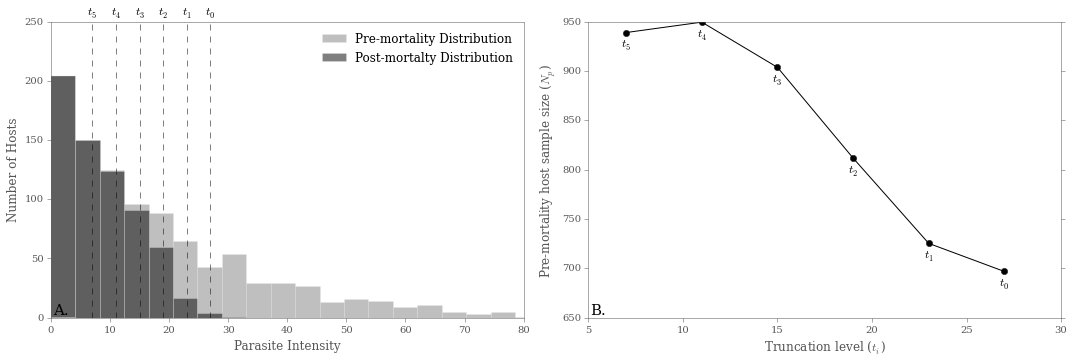

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = axes[0]
ax2 = axes[1]
                        
plt.rcParams['text.usetex'] = False
_, bins, _ = ax.hist(pre, alpha=0.5, bins=30, color="grey", label="Pre-mortality Distribution")
ax.hist(post, bins=bins, alpha=0.5, zorder=1, label="Post-mortalty Distribution", color="black")

ax.set_ylabel("Number of Hosts")
ax.set_xlabel("Parasite Intensity")
#ax.vlines(10, 0, 350, color="red")


ax.set_xlim(0, 80)
ax.tick_params(right=False, top=False)
ax.legend(frameon=False, prop={'size':12})
ylim = ax.get_ylim()
ax.text(.02, .01, "A.", horizontalalignment="center", transform=ax.transAxes, size=15)

Ns = np.array(zip(*params)[0])
ax2.plot(trun_levels[::2], Ns, 'o-', color="black")
#ax2.set_xlim(4, 26)
ax2.set_xlabel(r"Truncation level ($t_i$)")
ax2.set_ylabel(r"Pre-mortality host sample size ($N_p$)")
ax2.tick_params(top=False, right=True)
ax2.text(.02, .01, "B.", horizontalalignment="center", transform=ax2.transAxes, size=15)

for i, t in enumerate(trun_levels[::2][::-1]):
    ax.vlines(t, ylim[0], ylim[1], linestyle="--", alpha=0.5)
    ax.text(t, ylim[1] + 5, r"$t_{%i}$" % i, size=12, horizontalalignment="center")

inds = np.arange(0, len(trun_levels[::2]))[::-1]
for i, t in enumerate(trun_levels[::2]):
    
    ax2.text(t, Ns[i] - 15, r"$t_{%i}$" % inds[i], size=12, horizontalalignment='center')

plt.tight_layout()
#fig.savefig("../results/concept_crofton_method.pdf",  dpi=300)